In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time

from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise_from_obs()
frame.noise_mean, frame.noise_std

(6433355.580063389, 636997.1220695041)

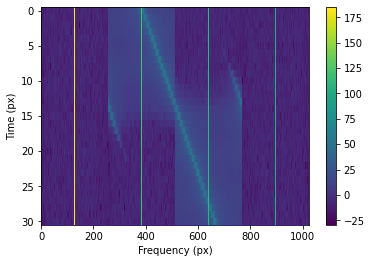

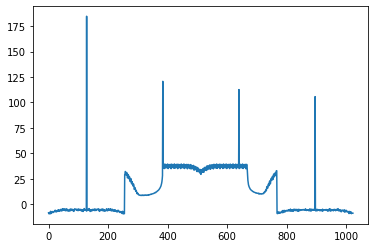

In [4]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=frame.noise_mean, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (1))*u.Hz, 
                  drift_rate=3e8*u.Hz/u.s, 
                  level=10)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [5]:
nyquist_freq = sample_rate / 2
coarse_channel_width = nyquist_freq / (P / 2)

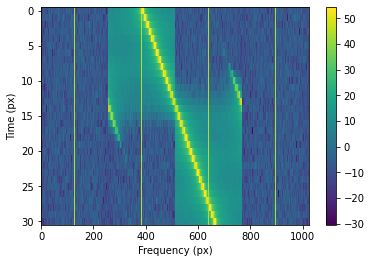

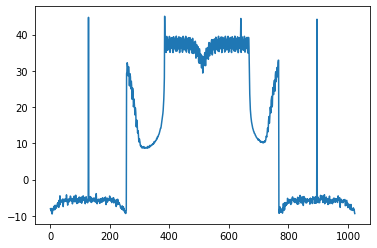

In [6]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=frame.noise_mean, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (101))*u.Hz, 
                  drift_rate=3e8*u.Hz/u.s, 
                  level=10)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=100,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

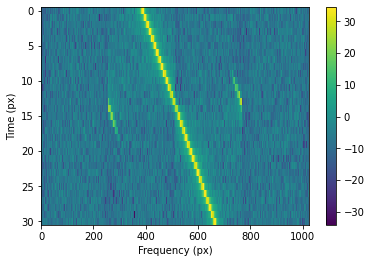

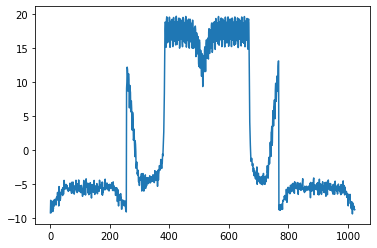

In [7]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204))*u.Hz, 
                  drift_rate=3e8*u.Hz/u.s, 
                  level=1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

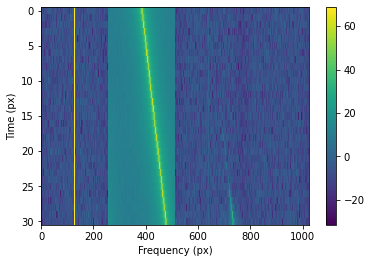

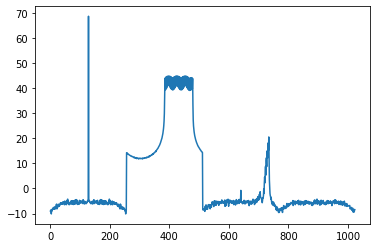

In [8]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=10, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (1))*u.Hz, 
                  drift_rate=1e8*u.Hz/u.s, 
                  level=10)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=0,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [9]:
XX_psd.shape

(31, 1024)

In [10]:
1.5e9/512 * np.array([203, 204, 205, 206, 207])

array([5.94726562e+08, 5.97656250e+08, 6.00585938e+08, 6.03515625e+08,
       6.06445312e+08])

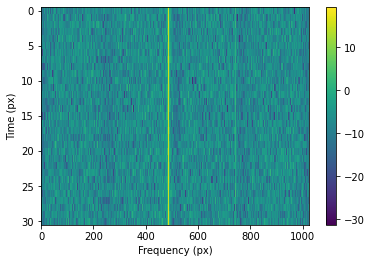

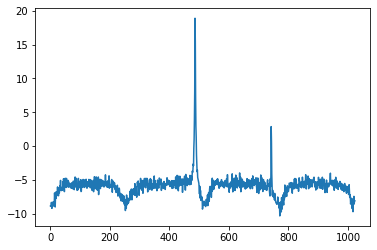

In [11]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

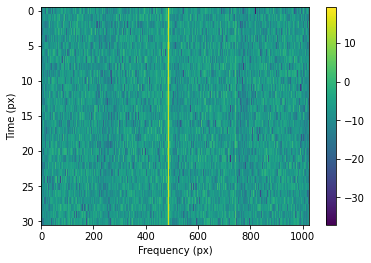

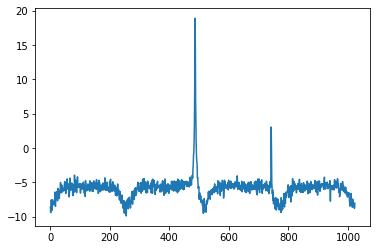

In [12]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()